<a href="https://colab.research.google.com/github/omnyx2/ArcSolver/blob/main/ArcSolver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import matplotlib.pyplot as plt

colors = [
    [0, 0, 0], [0, 116, 217], [255, 65, 54], [46, 204, 64], [255, 220, 0],
    [170, 170, 170], [240, 18, 190], [255, 133, 27], [127, 219, 255], [135, 12, 37]
]

def paint(matrix):
    m, n = len(matrix), len(matrix[0])
    matrix_colored = [[colors[element] for element in row] for row in matrix]
    plt.figure(figsize=(3, 3))
    plt.title(f'({m} x {n})')
    plt.imshow(matrix_colored)
    plt.axis('off')
    plt.show()

In [17]:
def beautiful_arc(data):
  for pairs in data:
    # print(pairs)
    input_ptr = np.array(pairs['input']) # Access the 'input' value
    output_ptr = np.array(pairs['output']) # Access the 'output' value
    paint(input_ptr)
    paint(output_ptr)


In [18]:
def beautiful_arc_for_kaggle(data):
  for pairs in data:
    # print(pairs)
    input_ptr = np.array(pairs['input']) # Access the 'input' value
    output_ptr = np.array(pairs['output']) # Access the 'output' value
    paint(input_ptr)
    paint(output_ptr)


In [19]:
!git clone https://github.com/fchollet/ARC-AGI.git
!cp -r ./ARC-AGI/* ./

Cloning into 'ARC-AGI'...
remote: Enumerating objects: 1274, done.
remote: Counting objects: 100% (305/305), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 1274 (delta 192), reused 200 (delta 175), pack-reused 969 (from 1)
Receiving objects: 100% (1274/1274), 499.92 KiB | 11.63 MiB/s, done.
Resolving deltas: 100% (725/725), done.


In [20]:
import os
import glob
import json
import numpy as np
from typing import List, Dict, Any

def get_json_files(directory):
    # Get the full path of all JSON files in the specified directory
    json_files = glob.glob(os.path.join(directory, "*.json"))

    # Extract just the filenames from the full paths
    json_filenames = [os.path.basename(file) for file in json_files]

    return json_filenames

In [21]:
# read all data files

eval = './data/evaluation/'
training = './data/training/'

curmode = training

# Call the function and print the results
json_files = get_json_files(curmode)
print("JSON files in the 'evaluation' directory:")

JSON files in the 'evaluation' directory:


In [22]:
def load_data(file_path: str) -> Dict[str, Any]:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist.")
    with open(file_path, 'r') as f:
        return json.load(f)

In [23]:
def process_json_files(json_files, base_path):
    train_data = []
    test_data = []
    for file_path in json_files:
        filename = base_path+file_path
        # print(f"Processing {filename}:{file_path}")
        data = load_data(filename)


        if "train" in data:
            train_data.append(data["train"])
        elif "test" in data:
            test_data.append(data["test"])
        else:
            print("  Does not contain 'train' or 'test' key")

    return train_data, test_data

In [24]:
train_data, test_data = process_json_files(json_files, curmode)

In [25]:
!pip install -U arckit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.3/730.3 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 4.1 MB/s eta 0:00:00


In [26]:
import arckit
import arckit.vis as vis
train_set, eval_set = arckit.load_data() # Load ARC1 train/eval

In [27]:
train_set

<TaskSet: 400 tasks>

In [28]:
train_set[0] == train_set['007bbfb7']

True

In [29]:
train_set

<TaskSet: 400 tasks>

In [30]:
train_set[0]

<Task-train 007bbfb7 | 5 train | 1 test>

In [31]:
train_set[15].show()

                                <Task-train 0d3d703e | 4 train | 1 test>                                 
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━┳━━━━━━━━┓
┃ A-in 3x3 ┃ A-out 3x3 ┃ B-in 3x3 ┃ B-out 3x3 ┃ C-in 3x3 ┃ C-out 3x3 ┃ D-in 3x3 ┃ D-out 3x3 ┃  ┃ TA-in  ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━╇━━━━━━━━┩
│  3 1 2   │   4 5 6   │  2 3 8   │   6 4 9   │  5 8 6   │   1 9 2   │  9 4 2   │   8 3 6   │  │ 8 1 3  │
│  3 1 2   │   4 5 6   │  2 3 8   │   6 4 9   │  5 8 6   │   1 9 2   │  9 4 2   │   8 3 6   │  │ 8 1 3  │
│  3 1 2   │   4 5 6   │  2 3 8   │   6 4 9   │  5 8 6   │   1 9 2   │  9 4 2   │   8 3 6   │  │ 8 1 3  │
└──────────┴───────────┴──────────┴───────────┴──────────┴───────────┴──────────┴───────────┴──┴────────┘

                                <Task-train 0d3d703e | 4 train | 1 test>                                 
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━┳━━━━━━━━┓
┃ A-in 3x3 ┃ A-out 3x3 ┃ B-in 3x3 ┃ B-out 3x3 ┃ C-in 3x3 ┃ C-out 3x3 ┃ D-in 3x3 ┃ D-out 3x3 ┃  ┃ TA-in  ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━╇━━━━━━━━┩
│  3 1 2   │   4 5 6   │  2 3 8   │   6 4 9   │  5 8 6   │   1 9 2   │  9 4 2   │   8 3 6   │  │ 8 1 3  │
│  3 1 2   │   4 5 6   │  2 3 8   │   6 4 9   │  5 8 6   │   1 9 2   │  9 4 2   │   8 3 6   │  │ 8 1 3  │
│  3 1 2   │   4 5 6   │  2 3 8   │   6 4 9   │  5 8 6   │   1 9 2   │  9 4 2   │   8 3 6   │  │ 8 1 3  │
└──────────┴───────────┴──────────┴───────────┴──────────┴───────────┴──────────┴───────────┴──┴────────┘

In [32]:
task = arckit.load_single('007bbfb7')

In [33]:
task.test[0][0]

array([[7, 0, 7],
       [7, 0, 7],
       [7, 7, 0]])

In [34]:
!git clone https://github.com/michaelhodel/arc-dsl.git

Cloning into 'arc-dsl'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 227 (delta 109), reused 152 (delta 100), pack-reused 62 (from 1)
Receiving objects: 100% (227/227), 493.70 KiB | 10.50 MiB/s, done.
Resolving deltas: 100% (133/133), done.


In [35]:
%cp -r ./arc-dsl/* ./

In [36]:
task.train[0][1:][0]

array([[0, 0, 0, 0, 7, 7, 0, 7, 7],
       [0, 0, 0, 7, 7, 7, 7, 7, 7],
       [0, 0, 0, 0, 7, 7, 0, 7, 7],
       [0, 7, 7, 0, 7, 7, 0, 7, 7],
       [7, 7, 7, 7, 7, 7, 7, 7, 7],
       [0, 7, 7, 0, 7, 7, 0, 7, 7],
       [0, 0, 0, 0, 7, 7, 0, 7, 7],
       [0, 0, 0, 7, 7, 7, 7, 7, 7],
       [0, 0, 0, 0, 7, 7, 0, 7, 7]])

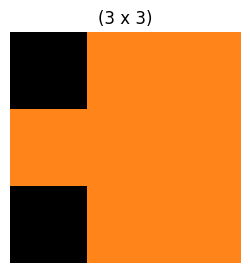

In [37]:
paint(task.train[0][0:][0])

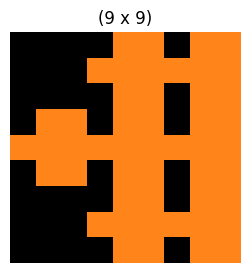

In [38]:
paint(task.train[0][1:][0])

In [39]:
import solvers

In [40]:
# solvers.objects(answer, True, True, False)

In [41]:
dsl_list = [item for item in dir(solvers) if item.startswith('solve')]

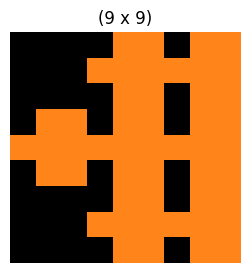

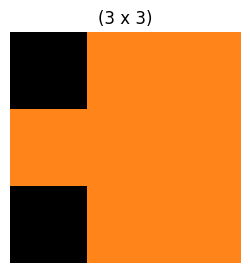

In [42]:
question = task.train[0][1:][0]
answer = task.train[0][0:][0]
paint(question)
paint(answer)

In [43]:
if answer.all() == answer.all():
  print("yes")

yes


In [44]:
def compare_2d_lists(list1, list2):
    return np.array_equal(np.array(list1), np.array(list2))

# Example usage
a = [[1, 2, 3], [4, 5, 6]]
b = [[1, 2, 3], [4, 5, 6]]
c = [[1, 2, 3], [4, 5, 7]]

print(compare_2d_lists(a, b))  # True
print(compare_2d_lists(a, c))  # False

True
False


In [45]:
def compare_2d_np_lists(list1, list2):
    if len(list1) != len(list2):
        return False
    if len(list1[0]) != len(list2[0]):
        return False
    return np.array_equal( list1,  list2)

In [46]:
def make_recode_map(train_set):
  map = dict()
  for tasks in train_set:
    id = tasks.id
    map[id] = {
        "id": id,
        "tot_time_takes": 0,
        "each_recoder": [],
        "train_count": len(tasks.train),
    }
    for idx,task in enumerate(tasks.train):
      map[id]["each_recoder"].append({
        "idx": idx,
        "Q": task[1],
        "A": task[0],
        "time_take": 0,
        "train_solver_name_arr": [],
        "train_cannot_adjust_map": [],
        "train_failed_adjust_map": [],
        "train_is_solved_check_arr": [],
      })

  return map

recoder = make_recode_map(train_set)

In [47]:
display(recoder)

{'007bbfb7': {'id': '007bbfb7',
  'tot_time_takes': 0,
  'each_recoder': [{'idx': 0,
    'Q': array([[0, 0, 0, 0, 7, 7, 0, 7, 7],
           [0, 0, 0, 7, 7, 7, 7, 7, 7],
           [0, 0, 0, 0, 7, 7, 0, 7, 7],
           [0, 7, 7, 0, 7, 7, 0, 7, 7],
           [7, 7, 7, 7, 7, 7, 7, 7, 7],
           [0, 7, 7, 0, 7, 7, 0, 7, 7],
           [0, 0, 0, 0, 7, 7, 0, 7, 7],
           [0, 0, 0, 7, 7, 7, 7, 7, 7],
           [0, 0, 0, 0, 7, 7, 0, 7, 7]]),
    'A': array([[0, 7, 7],
           [7, 7, 7],
           [0, 7, 7]]),
    'time_take': 0,
    'train_solver_name_arr': [],
    'train_cannot_adjust_map': [],
    'train_failed_adjust_map': [],
    'train_is_solved_check_arr': []},
   {'idx': 1,
    'Q': array([[4, 0, 4, 0, 0, 0, 4, 0, 4],
           [0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 4, 0, 0, 0, 0, 0, 4, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 4, 0, 4, 0, 0, 0],
           [0, 

In [48]:
import time
# 빠르게 분석을 위해서 가장 첫번째만 긁어서 패턴비교(문제의
def check_sols(train_set, dsl_list, recoder):
  n_correct = 0
  n_try = 0
  for tasks in train_set:
      n_try += 1
      start_time = time.time()
      id = tasks.id
      print(n_try, "th is trying:", id )
      for idx, task in enumerate(tasks.train):
        A = task[1].tolist() # [0:]
        Q = task[0].tolist() # [1:] 이건 뭐였지??
        for dsl in dsl_list:
          func = getattr(solvers, dsl)
          result = None
          try :
            result = compare_2d_np_lists(func(Q), A)
          except:
            pass
          if result: # result에 연산에 대한 적용이 성공한상태
            n_correct += 1
            recoder[tasks.id]["each_recoder"][idx]["train_solver_name_arr"].append(dsl)
          elif result == None: # result는 None상태 1. 연산자의 적용자체가 실패함.
            recoder[tasks.id]["each_recoder"][idx]["train_cannot_adjust_map"].append(dsl)
          elif result == False: #result는 False상태 연산의 적용은 가능했으나 실패한 상태.
            recoder[tasks.id]["each_recoder"][idx]["train_failed_adjust_map"].append(dsl)
          take = start_time -time.time()
          recoder[tasks.id]["each_recoder"][idx]["time_take"] = take
      takes = start_time -time.time()
      recoder[tasks.id]['time_takes'] = takes

  return n_correct, n_try , recoder


n_corm, n_try, recoder = check_sols(train_set, dsl_list, recoder)
# print(recoder)

1 th is trying: 007bbfb7
2 th is trying: 00d62c1b
3 th is trying: 017c7c7b
4 th is trying: 025d127b
5 th is trying: 045e512c
6 th is trying: 0520fde7
7 th is trying: 05269061
8 th is trying: 05f2a901
9 th is trying: 06df4c85
10 th is trying: 08ed6ac7
11 th is trying: 09629e4f
12 th is trying: 0962bcdd
13 th is trying: 0a938d79
14 th is trying: 0b148d64
15 th is trying: 0ca9ddb6
16 th is trying: 0d3d703e
17 th is trying: 0dfd9992
18 th is trying: 0e206a2e
19 th is trying: 10fcaaa3
20 th is trying: 11852cab
21 th is trying: 1190e5a7
22 th is trying: 137eaa0f
23 th is trying: 150deff5
24 th is trying: 178fcbfb
25 th is trying: 1a07d186
26 th is trying: 1b2d62fb
27 th is trying: 1b60fb0c
28 th is trying: 1bfc4729
29 th is trying: 1c786137
30 th is trying: 1caeab9d
31 th is trying: 1cf80156
32 th is trying: 1e0a9b12
33 th is trying: 1e32b0e9
34 th is trying: 1f0c79e5
35 th is trying: 1f642eb9
36 th is trying: 1f85a75f
37 th is trying: 1f876c06
38 th is trying: 1fad071e
39 th is trying: 2013

In [49]:
display(recoder["88a62173"])

{'id': '88a62173',
 'tot_time_takes': 0,
 'each_recoder': [{'idx': 0,
   'Q': array([[2, 2],
          [2, 0]]),
   'A': array([[0, 2, 0, 0, 2],
          [2, 2, 0, 2, 2],
          [0, 0, 0, 0, 0],
          [0, 2, 0, 2, 2],
          [2, 2, 0, 2, 0]]),
   'time_take': -0.049360036849975586,
   'train_solver_name_arr': ['solve_88a62173', 'solve_a68b268e'],
   'train_cannot_adjust_map': ['solve_017c7c7b',
    'solve_025d127b',
    'solve_045e512c',
    'solve_0520fde7',
    'solve_05269061',
    'solve_05f2a901',
    'solve_06df4c85',
    'solve_08ed6ac7',
    'solve_09629e4f',
    'solve_0962bcdd',
    'solve_0a938d79',
    'solve_0b148d64',
    'solve_0dfd9992',
    'solve_0e206a2e',
    'solve_10fcaaa3',
    'solve_11852cab',
    'solve_1190e5a7',
    'solve_137eaa0f',
    'solve_178fcbfb',
    'solve_1a07d186',
    'solve_1b60fb0c',
    'solve_1bfc4729',
    'solve_1caeab9d',
    'solve_1cf80156',
    'solve_1e32b0e9',
    'solve_1f642eb9',
    'solve_1f85a75f',
    'solve_1f876c06

 ice cuber greedy stacking 이걸 통해서 좀 더 나은 연산자 셋 을
 arc 400개의 데이터에 대해서 HardCoding 해둔것으로 알고 있음.
 solver_?

 정답률이 0인데요 ?ㅋㅋ 정신 나갈꺼 같네
 아 아니다 ㅋㅋ 정답률 9%? 정도는 나오네 -> 다시한번 해보자,
 ice-cuber 연산자 개수가 많지는 않기는 한데 흠
 오브젝트 분석하는 소스 코드좀 더 분석을 해봅세다

 -> 보니까 객체 추론 쪽이 좀 부족하넹
 -> 오브젝트만 잘 늘려도 정확도가 늘어날꺼 같은데

ARC easy와 ARC hard에 대해서 좀 더 곰곰히 생각해본바
ARC의 문제따라서 어떤 연산을 써야하는 계인지 유추하고 이를 바탕으로 연산을 시도하는 AI를 만들어보고자함.


In [50]:
def recoder_np_to_list(recoder):

  for tasks in train_set:
    id = tasks.id
    for idx,task in enumerate(tasks.train):
      recoder[id]["each_recoder"][idx]["Q"]  = recoder[id]["each_recoder"][idx]["Q"].tolist()
      recoder[id]["each_recoder"][idx]["A"]  = recoder[id]["each_recoder"][idx]["A"].tolist()

  return recoder

recoder = recoder_np_to_list(recoder)

In [51]:
import json
import codecs, json

# Specify the file name
filename = 'recoder-0.json'

# Write the dictionary to a JSON file
with open(filename, 'w') as json_file:
    json.dump(recoder, json_file, indent=4)

print(f"Dictionary written to {filename}")

Dictionary written to recoder-0.json


In [52]:
def make_func_oper_map():
   with open(filename, 'w') as json_file:
    json.dump(recoder, json_file, indent=4)


연산자들을 어떻사용하는지 바라보고 싶다.


1. 어떤 연사산를 적용할 수 있는 형상인가
1-1. 형상은 무엇이 될 것인가
2. 연산들을 어떻게 나열할 것인가
3. 이를 어떻게 최적화 할것인가

# 형상과 연산(dsl, 기초연산자, 복합연산자)

형상 - 논문마다 다르게 적용을 진행함.

ARC - Hard - eval set
ARC - EASY - train set
PeARL

연산자

일단은 기초연산자는 사람이 구성하고

복합연산자는 ice cuber사람이 아닌 기계가 고민해볼수 있도록

1.

----
문제마다 연산적용하는 대상을 정의 방법이 다르고
연산을 적용해서 푸는 법이 다르고
연산도 다르고
추상대수학 - 체 -> 연산자들이 다르고

한 바구니에는 연산자 바구니
한 바구니에는 형태 바구니 (object)

확률적으로 할수 있게는 하고 이를 문제를 솔빙을 해보자를 목표,

--> 나이브하게 구현해서 해보기,

연산자 바구니 & 형태류 바구니



---
Next step
난관 on
fine tune domain

Auto domain-adoptation:



In [53]:
def readfile_save_line_array(file_path):
  # Define the path to the .py file
  file_path = 'solvers.py'
  data = []
  # Open and read the file line by line
  try:
      with open(file_path, 'r') as file:
          for line_number, line in enumerate(file, start=1):
              # Process each line (e.g., print it with line number)
              # print(f"Line {line_number}: {line.strip()}")
              data.append(line.strip())
      return data
  except FileNotFoundError:
      print(f"The file at {file_path} was not found.")
  except Exception as e:
      print(f"An error occurred: {e}")


In [54]:
def readfile(file_path):
  # Define the path to the .py file
  # Open and read the file line by line
  try:
      with open(file_path, 'r') as file:
         return file.read()
  except FileNotFoundError:
      print(f"The file at {file_path} was not found.")
  except Exception as e:
      print(f"An error occurred: {e}")

In [55]:
code = readfile_save_line_array("")

In [56]:
import re

def parse_function_names(code):
    # 함수 호출 패턴을 매칭하는 정규 표현식
    pattern = r'\b(\w+)\s*\('

    # 코드에서 함수 이름을 추출
    function_names = re.findall(pattern, code)

    # 내장 함수나 키워드 등을 필터링하려면 필요 시 추가 필터링 가능
    # 여기서는 그냥 모든 함수 이름을 반환함
    return function_names

def parse_function_name(line):
    # 함수 호출 패턴을 매칭하는 정규 표현식
    pattern = r'\b(\w+)\s*\('

    # 코드에서 함수 이름을 추출
    function_name = re.findall(pattern, line)

    # 내장 함수나 키워드 등을 필터링하려면 필요 시 추가 필터링 가능
    # 여기서는 그냥 모든 함수 이름을 반환함
    if len(function_name) == 0:
      return None
    elif len(function_name)== 1:
      return function_name[0]
    else:
      return function_name

# # 예시 코드
# code = """
# def solve_5117e062(I):
#     x1 = objects(I, F, T, T)
#     x2 = matcher(numcolors, TWO)
#     x3 = extract(x1, x2)
#     x4 = subgrid(x3, I)
#     x5 = mostcolor(x3)
#     O = replace(x4, EIGHT, x5)
#     return O
# """

# parsed_functions = parse_function_names(code)
# print(parsed_functions)


In [57]:
dsls = [ parse_function_name(line) for line in code ]

solve_36fdfd69 여기에서 compose와 lbind쪽이 뭉쳐서 제대로 파씽이 안된다 이부분을 잘 풀어서 해체해 줘야한다.

In [58]:
dsls

[None,
 None,
 None,
 None,
 'solve_67a3c6ac',
 'vmirror',
 None,
 None,
 None,
 'solve_68b16354',
 'hmirror',
 None,
 None,
 None,
 'solve_74dd1130',
 'dmirror',
 None,
 None,
 None,
 'solve_3c9b0459',
 'rot180',
 None,
 None,
 None,
 'solve_6150a2bd',
 'rot180',
 None,
 None,
 None,
 'solve_9172f3a0',
 'upscale',
 None,
 None,
 None,
 'solve_9dfd6313',
 'dmirror',
 None,
 None,
 None,
 'solve_a416b8f3',
 'hconcat',
 None,
 None,
 None,
 'solve_b1948b0a',
 'replace',
 None,
 None,
 None,
 'solve_c59eb873',
 'upscale',
 None,
 None,
 None,
 'solve_c8f0f002',
 'replace',
 None,
 None,
 None,
 'solve_d10ecb37',
 'crop',
 None,
 None,
 None,
 'solve_d511f180',
 'switch',
 None,
 None,
 None,
 'solve_ed36ccf7',
 'rot270',
 None,
 None,
 None,
 'solve_4c4377d9',
 'hmirror',
 'vconcat',
 None,
 None,
 None,
 'solve_6d0aefbc',
 'vmirror',
 'hconcat',
 None,
 None,
 None,
 'solve_6fa7a44f',
 'hmirror',
 'vconcat',
 None,
 None,
 None,
 'solve_5614dbcf',
 'replace',
 'downscale',
 None,
 None,


In [59]:
# Initialize variables
result = {}
current_id = None
current_functions = []

# Process the array
for item in dsls:
    print(item)
    if item is None:
        continue
    if item.startswith("solve_"):
        if current_id:
            # Store the previous id and its associated functions
            result[current_id] = current_functions

        # Extract the id from the 'solve_' string
        current_id = item
        current_functions = []
    else:
        current_functions.append(item)

# Don't forget to add the last group to the dictionary
if current_id:
    result[current_id] = current_functions

# Print the resulting dictionary
# print(result)

None
None
None
None
solve_67a3c6ac
vmirror
None
None
None
solve_68b16354
hmirror
None
None
None
solve_74dd1130
dmirror
None
None
None
solve_3c9b0459
rot180
None
None
None
solve_6150a2bd
rot180
None
None
None
solve_9172f3a0
upscale
None
None
None
solve_9dfd6313
dmirror
None
None
None
solve_a416b8f3
hconcat
None
None
None
solve_b1948b0a
replace
None
None
None
solve_c59eb873
upscale
None
None
None
solve_c8f0f002
replace
None
None
None
solve_d10ecb37
crop
None
None
None
solve_d511f180
switch
None
None
None
solve_ed36ccf7
rot270
None
None
None
solve_4c4377d9
hmirror
vconcat
None
None
None
solve_6d0aefbc
vmirror
hconcat
None
None
None
solve_6fa7a44f
hmirror
vconcat
None
None
None
solve_5614dbcf
replace
downscale
None
None
None
solve_5bd6f4ac
tojvec
crop
None
None
None
solve_5582e5ca
mostcolor
canvas
None
None
None
solve_8be77c9e
hmirror
vconcat
None
None
None
solve_c9e6f938
vmirror
hconcat
None
None
None
solve_2dee498d
hsplit
first
None
None
None
solve_1cf80156
objects
first
subgrid
None
Non

AttributeError: 'list' object has no attribute 'startswith'

In [ ]:
print(result)

In [ ]:
paint(train_set["007bbfb7"].train[0][0])
solvers.solve_007bbfb7(train_set["007bbfb7"].train[0][0].tolist())

In [ ]:
import json
import codecs, json

# Specify the file name
filename = 'solver-dsl-0.json'

# Write the dictionary to a JSON file
with open(filename, 'w') as json_file:
    json.dump(result, json_file, indent=4)

print(f"Dictionary written to {filename}")

400개의 문제에 대해서 400개의 분리점이 존재한다. 400개가 전부 다르다면 이를 어찌하면 좋은가, 공통된 문제는 풀수 있다
그러나 공통되지 않은 문제에 한하여 이를 풀수 있는가 ?

연산의 적용에는 2개의 타입이 있다. 순서가 중요한 연산자 그리고 순서가 중요하지 않은 연산자, 이를 어찌 구별할 것인가.(?)

KNN은 기초연산자의 동일성을 바탕으로 분류를 진행한다.

DSL 중에서 세 부류로 나뉜다.

1. 적용에 성공한 녀석들 - 매우 소수
2. 적용 가능하지만 실패한 녀석들 - 생각보다 많음
3. 적용이 불가한 녀석들 - 절반

이를 어떻게 해결할 것인가.
1번을 처음부터 찾아내는 것은 어렵다.
2번을 골라내고 그중에서 1번을 찾아내는게 가능한 적용법 아닐까?

1-2를 통해서 적용 가능한 연산의 범위를 찾아내고 3을 통해서 적용이 불가능한 연산의 범위를 찾아낸다. 이후에 적용가능한 연산의 범위가 동일한 녀석들을 하나의 군으로 묶어볼 수 있을 듯 하고, 이를 바탕으로 문제를 특정한 연산을 소유하는 개념으로 볼 수 있을듯 하다.

1. 1-2를 통해서 적용가능한 연산을 뽑아내자, 그리고 추후에 각 단계별로 적용가능한 모든 연산을 추출하자. 그렇게 해서 각 그림의 형태마다 적용가능한 연산자들을 추출한다.
이후에 전체 연산자 추론 모델을 만들어본다.


In [ ]:
import json
import codecs, json

recoder = readfile('recoder-0.json')
recoder = json.loads(recoder)

In [ ]:
train

In [ ]:
solver_dsls = readfile('solver-dsl-0.json')
solver_dsls = json.loads(solver_dsls)

In [ ]:
def bind_prob_dsl(sol_list, solver_dsls):
  data = []
  if len(sol_list) ==0:
    return []
  for sol in sol_list:
    print(sol)
    data.append(solver_dsls[sol])
  return data

In [ ]:

for tasks in recoder:
    print(recoder[tasks]["id"])
    for idx, task in enumerate(recoder[tasks]["each_recoder"]):
      recoder[tasks]["each_recoder"][idx]["dsl"] = []
      for sol in task["train_failed_adjust_map"]:
          recoder[tasks]["each_recoder"][idx]["dsl"].append(result[sol])
          print(recoder[tasks]["each_recoder"][idx]["dsl"])
      if(idx > 1):
          break




In [ ]:
train[007bbfb7][1]

In [ ]:
graph_data =

for tasks in recoder:
    print(recoder[tasks]["id"])
    for idx, task in enumerate(recoder[tasks]["each_recoder"]):
      recoder[tasks]["each_recoder"][idx]["dsl"] = []
      for sol in task["train_failed_adjust_map"]:
          recoder[tasks]["each_recoder"][idx]["dsl"].append(result[sol])
          print(recoder[tasks]["each_recoder"][idx]["dsl"])
      if(idx > 1):
          break

In [ ]:
for tasks in recoder:
    print(recoder[tasks]["id"])
    for idx, task in enumerate(recoder[tasks]["each_recoder"]):
      recoder[tasks]["each_recoder"][idx]["dsl"] = []
      for sol in task["train_solver_name_arr"]:
          print(recoder[tasks]["each_recoder"][idx]["train_solver_name_arr"])
          print("-------------")



In [ ]:
class DataSvaer:
  def __init__(self):
    self.dataType =
    self.fileName =
    self.dataFormat =


해야할일 정리

# 문제 관점
1. 문제의 유형성 확인: -> 현재 불가 -> 문제 풀이 유형성의 비교를 통해 해석하고자함.
1-1. 문제의 유형성 분석 방법: 문제 그림 Base, 문제 풀이 Base, 문제의 질문& 정답의 형상 Base
1-2. 가장 쉬운 도전은 현재 문제의 풀이를 Base로 문제의 유형을 분류 할 수 있는가 ?
1-3. 이는 절대적으로 가능함. 논리: 문제에 정답과 해답의 존재성이 결정적이라 한다면 이는 곧 풀이의 종류는 무한하지 않음을 시사.
1-4. 단점: 가능한 것과 별개로 문제의 풀이가 종류를 전부 도전하는 것은 현실적(주어진 풀이시간 ex:10분)내에 불가할 수 있음을 시사.
---
# 문제 풀이 유형을 기점으로 한 존재성에 대한 확인
2. 문제 풀이 유형의 존재성 확인:
2-1. Graph 추출 해서 유사도 비교를 통해 KNN뽑아보기
2-2. 연산자간의 관계를 DFA로 표기하여 유사성 비교알고리즘을 통해 KNN 뽑아보기
3. 문제 풀이 유형별 풀이의 유사성확인: KNN을 통해서 확인된 군집에 대해, 사용된 연산자의 통일성 확인.
3-1. 연산자의 종류: 순서가 중요한 연산자 & 순서가 중요하지 않은 연산자.
4.

In [ ]:
dag_data1 = bind_prob_dsl(recoder["00d62c1b"]["each_recoder"][4]["train_solver_name_arr"]
,solver_dsls)

In [ ]:
dag_data1

In [ ]:
!pip install networkx matplotlib


In [ ]:
1. 적용가능했던 풀이의 연산자를 모두 호출한다.
2. 계를 분류한다.

In [ ]:
dag_data

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict, deque

class DAG:
    def __init__(self):
        self.graph = defaultdict(set)
        self.in_degree = defaultdict(int)
        self.nodes = set()

    def add_edge(self, from_node, to_node):
        if to_node not in self.graph[from_node]:
            self.graph[from_node].add(to_node)
            self.in_degree[to_node] += 1
            self.nodes.add(from_node)
            self.nodes.add(to_node)
            if from_node not in self.in_degree:
                self.in_degree[from_node] = 0

    def build_from_lists(self, lists):
        for lst in lists:
            for i in range(len(lst) - 1):
                self.add_edge(lst[i], lst[i + 1])

    def topological_sort(self):
        in_degree = dict(self.in_degree)
        print(self.nodes,in_degree)
        zero_in_degree_queue = deque([node for node in self.nodes if in_degree[node] == 0])
        topological_order = []
        print(zero_in_degree_queue)
        while zero_in_degree_queue:
            level = []
            for _ in range(len(zero_in_degree_queue)):
                node = zero_in_degree_queue.popleft()
                level.append(node)

                for neighbor in self.graph[node]:
                    in_degree[neighbor] -= 1
                    if in_degree[neighbor] == 0:
                        zero_in_degree_queue.append(neighbor)

            topological_order.append(level)

        return topological_order

    def format_topological_order(self, topological_order):
        formatted_order = []
        for level in topological_order:
            formatted_order.append(f"[{', '.join(level)}]")
        return " -> ".join(formatted_order)
    def draw_graph(self):
        G = nx.DiGraph()
        for node in self.graph:
            for neighbor in self.graph[node]:
                G.add_edge(node, neighbor)

        pos = nx.spring_layout(G)
        plt.figure(figsize=(6, 10))
        nx.draw(G, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=6, font_weight='normal', arrowsize=5)
        plt.title("DAG as Tree Graph", fontsize=16)
        plt.show()

# 예제 리스트들
lists = [
    ['A', 'B', 'C'],
    ['A', 'D', 'E'],
    ['B', 'D', 'G'],
    ['C', 'E'],
    ['E', 'F']
]

# DAG 생성
dag = DAG()
dag.build_from_lists(dag_data1)

# # 위상 정렬 수행
topological_order = dag.topological_sort()

# # 포맷된 출력
formatted_order = dag.format_topological_order(topological_order)
# print("포맷된 위상 정렬 결과:")
print(formatted_order)



만들어지는 중에 연산자가 cycle이 형성이 된다.
1. 사이클이 생성되는 연산자 종류 (동등 위상으로 발현된다)
2. 사이클이 형성되지 않는 연산자 종류가 있다. (동등하지 않은 위상으로 발현된다)
3.

In [ ]:
dag_data

In [ ]:
topological_order = dag.topological_sort()
formatted_order = dag.format_topological_order(topological_order)
print(formatted_order)


In [ ]:
dag.draw_graph()

In [ ]:
# DAG 생성
dag = DAG()
dag.build_from_lists(dag_data)

# 그래프 그리기
dag.draw_graph()